# Pymaceuticals Inc.



# Analysis:

   Given that correlation coefficient measures the strength and direction of the linear                  relationship between two variables,the correlation coefficient value of 0.84 indicates a strong        positive correlation between mouse weight and average tumor volume for the Capomulin regimen.          This means that as mouse weight increases, the average tumor volume tends to increase as well.
      
   The slope of the linear regression line represents the change in the average tumor volume for          each unit increase in mouse weight. In this case, the positive slope of the linear regression          line (calculated as 0.95) indicates that for every 1 gram increase in mouse weight, the average        tumor volume increases by 0.95 mm3.
    
   The intercept of the linear regression line (calculated as 21.55) represents the estimated            average tumor volume when mouse weight is 0 grams. However, since it is not possible to have a        mouse with 0 grams weight, the intercept may not have a meaningful interpretation in this              context.
    
   The p-value (calculated as 0.00) is a measure of the statistical significance of the linear            regression model. In this case, a p-value of 0.00 indicates that the linear regression model is        highly statistically significant, suggesting that there is a significant linear relationship          between mouse weight and average tumor volume for the Capomulin regimen.
    
   A lower standard error indicates a more precise estimate of the slope. In this case, a standard        error of 0.13 suggests a relatively low variability and a relatively precise estimate of the          slope in the Capomulin regimen.
    
  However, it’s important to note that correlation does not imply causation, and other factors may       also be influencing the relationship between mouse weight and tumor volume. Further analysis and       experimentation would be needed to establish causality and make definitive conclusions.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceuticals_analysis = pd.merge(study_results, mouse_metadata, on=["Mouse ID"], how='left')

# Display the data table for preview
pymaceuticals_analysis.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
# Checking the number of mice.
num_mice = pymaceuticals_analysis['Mouse ID'].nunique()
num_mice

249

In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = pymaceuticals_analysis[pymaceuticals_analysis.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = np.array(duplicate_mice['Mouse ID'].unique())
duplicate_mouse_ids

array(['g989'], dtype=object)

In [32]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_data = pymaceuticals_analysis[pymaceuticals_analysis['Mouse ID'].isin(duplicate_mouse_ids)]
all_duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

pymaceuticals_analysis_cleaned = pymaceuticals_analysis[pymaceuticals_analysis['Mouse ID'].isin(duplicate_mouse_ids)==False]

pymaceuticals_analysis_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [34]:
# Checking the number of mice in the clean DataFrame.
new_num_mice = len(pymaceuticals_analysis_cleaned['Mouse ID'].unique())                               
new_num_mice


248

# Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_grouped = pymaceuticals_analysis_cleaned.groupby(['Drug Regimen'])

# Calculate summary statistics using groupby and agg
summary_stats = regimen_grouped.agg({"Tumor Volume (mm3)":['mean', 'median','std','var','sem']})


# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={'mean': 'Mean Tumor Volume',
                                              'median': 'Median Tumor Volume',
                                              'var': 'Tumor Volume Variance',
                                              'std': 'Tumor Volume Std. Dev.',
                                              'sem': 'Tumor Volume Std. Err.'})

# Convert the series to a DataFrame
summary_stats_df = pd.DataFrame(summary_stats)

# Display the summary statistics table
summary_stats_df


Tumor Volume (mm3)                                             \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Std. Dev.   
Drug Regimen                                                                 
Capomulin             40.675741           41.557809               4.994774   
Ceftamin              52.591172           51.776157               6.268188   
Infubinol             52.884795           51.820584               6.567243   
Ketapril              55.235638           53.698743               8.279709   
Naftisol              54.331565           52.509285               8.134708   
Placebo               54.033581           52.288934               7.821003   
Propriva              52.320930           50.446266               6.622085   
Ramicane              40.216745           40.673236               4.846308   
Stelasyn              54.233149           52.431737               7.710419   
Zoniferol             53.236507           51.818479               6.966589   

                                                           
             Tumor Volume Variance Tumor Volume Std. Err.  
Drug Regimen                                               
Capomulin                24.947764               0.329346  
Ceftamin                 39.290177               0.469821  
Infubinol                43.128684               0.492236  
Ketapril                 68.553577               0.603860  
Naftisol                 66.173479               0.596466  
Placebo                  61.168083               0.581331  
Propriva                 43.852013               0.544332  
Ramicane                 23.486704               0.320955  
Stelasyn                 59.450562               0.573111  
Zoniferol                48.533355               0.516398

In [36]:
# Calculate summary statistics using groupby and agg in a single line
summary_stats_df = pymaceuticals_analysis_cleaned.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std' , 'sem']}).rename(columns={'Mean Tumor Volume': 'mean', 'Median Tumor Volume': 'median', 'Tumor Volume Variance': 'var', 'Tumor Volume Std. Dev.': 'std', 'Tumor Volume Std. Err.': 'sem'})

# Display the summary statistics table
summary_stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

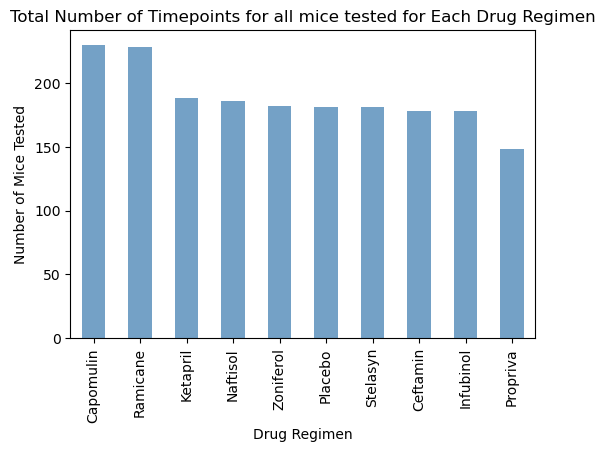

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Group the data by drug regimen and calculate the count of timepoints
timepoints_count = pymaceuticals_analysis_cleaned.groupby('Drug Regimen')['Timepoint'].count()

# Convert the grouped data into a DataFrame
timepoints_count_df = pd.DataFrame({'Drug Regimen': timepoints_count.index, 'Timepoints Count': timepoints_count.values})

# Sort the data by the count of timepoints in ascending order
timepoints_count_df = timepoints_count_df.sort_values(by='Timepoints Count', ascending=False)

# Create a bar plot using Pandas
timepoints_count_df.plot(x='Drug Regimen', y='Timepoints Count', kind='bar', color='steelblue', alpha=0.75, legend=False, figsize=(6, 4))

# Set the title and labels
plt.title('Total Number of Timepoints for all mice tested for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

# Display the plot
plt.show()

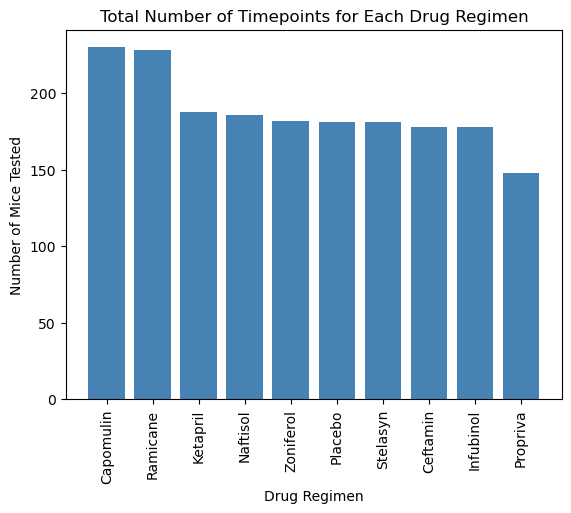

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Group the data by drug regimen and calculate the count of timepoints
timepoints_count = pymaceuticals_analysis_cleaned.groupby('Drug Regimen')['Timepoint'].count()

# Sort the drug regimens based on timepoints count in descending order
timepoints_count = timepoints_count.sort_values(ascending=False)

# Get the drug regimens and timepoints count as separate lists
drug_regimens = timepoints_count.index.tolist()
timepoints = timepoints_count.values.tolist()

# Create a bar plot using pyplot
plt.bar(drug_regimens, timepoints, color='steelblue', alpha=1)

# Set the title and labels
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


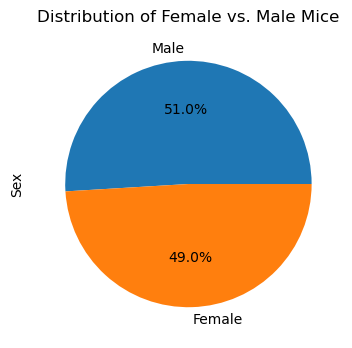

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the DataFrame by 'Sex' and count the number of occurrences
gender_counts = pymaceuticals_analysis_cleaned['Sex'].value_counts()

# Create a pie plot using Pandas
gender_counts.plot.pie(autopct='%1.1f%%', startangle=360, figsize=(6, 4))

# Add a title and labels
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex')

# Show the pie plot
plt.show()

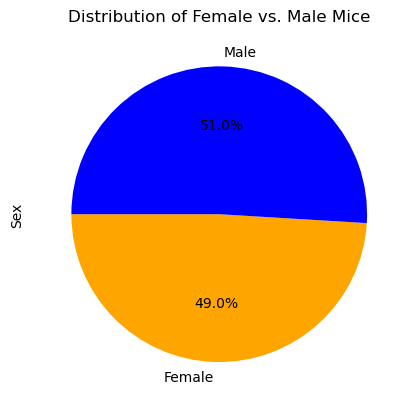

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = pymaceuticals_analysis_cleaned['Sex'].value_counts()

# Create data for the pie plot
labels = ['Female', 'Male']
sizes = [gender_counts['Female'], gender_counts['Male']]
colors = ['orange', 'blue']

# Create a figure with smaller size
plt.figure()
plt.ylabel('Sex')

# Create the pie plot using pyplot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)

# Add a title and legend
plt.title('Distribution of Female vs. Male Mice')

# Show the pie plot
plt.show()

# Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Define a list of treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Get the last (greatest) timepoint for each mouse
last_timepoints = pymaceuticals_analysis_cleaned.groupby('Mouse ID')['Timepoint'].max()

# Filter the original DataFrame for the four specific treatment regimens
filtered_df = pymaceuticals_analysis_cleaned[pymaceuticals_analysis_cleaned['Drug Regimen'].isin(treatment_regimens)]

# Merge the filtered DataFrame with the last timepoints to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(filtered_df, last_timepoints, on=['Mouse ID', 'Timepoint'])

# Display the final tumor volume for each mouse
final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]



,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,u153,Ceftamin,45.000000
1,b447,Ceftamin,45.000000
2,x226,Ceftamin,45.000000
3,t573,Ceftamin,45.000000
4,c326,Infubinol,36.321346
...,...,...,...
95,a644,Ramicane,32.978522
96,i177,Ramicane,33.562402
97,r944,Capomulin,41.581521
98,u364,Capomulin,31.023923


In [42]:
# Put treatments into a list for for loop (and later for plot labels)

# Define the treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Loop through each treatment regimen
for treatment in treatment_regimens:
    # Locate the rows which contain mice on the current treatment regimen and get the tumor volumes
    tumor_volumes = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    # Append the tumor volumes to the list of tumor volume data
    tumor_volume_data.append(tumor_volumes)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Find the potential outliers for the current treatment regimen
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"----- Treatment: {treatment} -----")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers}\n")
    
    
    


----- Treatment: Capomulin -----
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

----- Treatment: Ramicane -----
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

----- Treatment: Infubinol -----
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 4    36.321346
Name: Tumor Volume (mm3), dtype: float64

----- Treatment: Ceftamin -----
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



Text(0.5, 1.0, 'Distribution of Tumor Volume per Treatment Regimen')

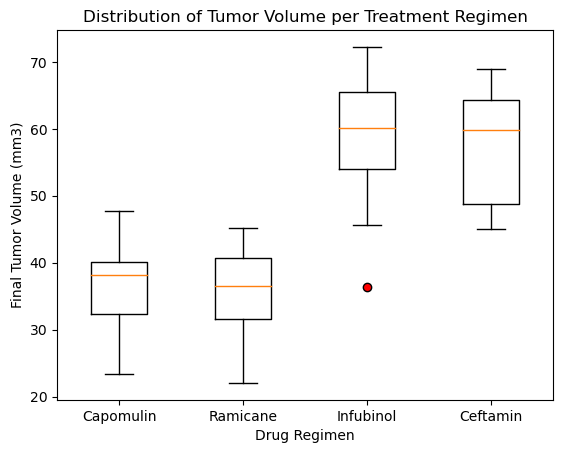

In [43]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()

# Generate the box plot
#ax.boxplot(tumor_volume_data, labels=treatment_regimens, marker='o', markerfacecolor='red')
red_circle = dict(markerfacecolor='red', marker='o')
ax.boxplot(tumor_volume_data, labels=treatment_regimens, flierprops=red_circle)


# Set labels and title
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Distribution of Tumor Volume per Treatment Regimen')


# Line and Scatter Plots

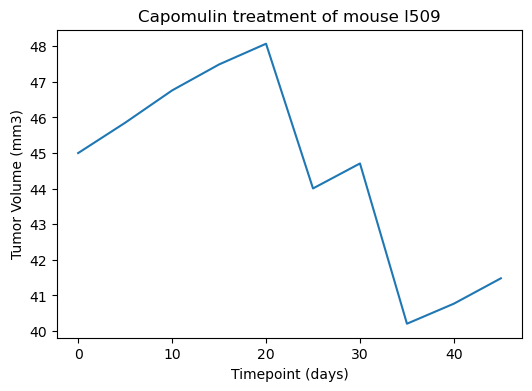

In [44]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Choose a mouse ID from the Capomulin treatment group
mouse_id = 'l509'

# Filter the data for the selected mouse (l509) treated with Capomulin
mouse_data = pymaceuticals_analysis_cleaned[pymaceuticals_analysis_cleaned['Mouse ID'] == mouse_id]

# Set the figure size
plt.figure(figsize=(6, 4))

# Create a line plot of tumor volume vs. time point
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Set labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse l509')

# Show the plot
plt.show()


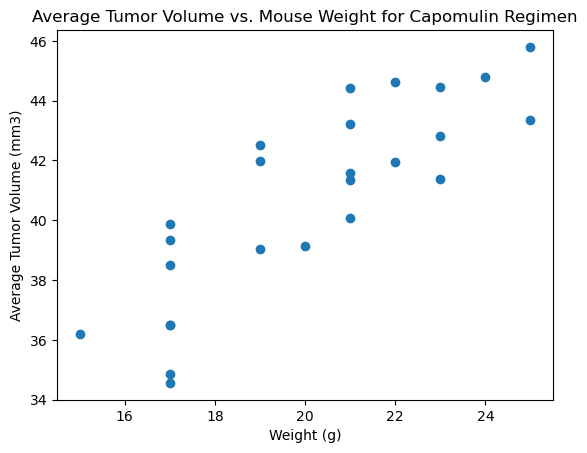

In [45]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = pymaceuticals_analysis_cleaned[pymaceuticals_analysis_cleaned['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot
plt.scatter(mouse_weight, avg_tumor_volume)

# Set labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')

# Show the plot
plt.show()


# Correlation and Regression

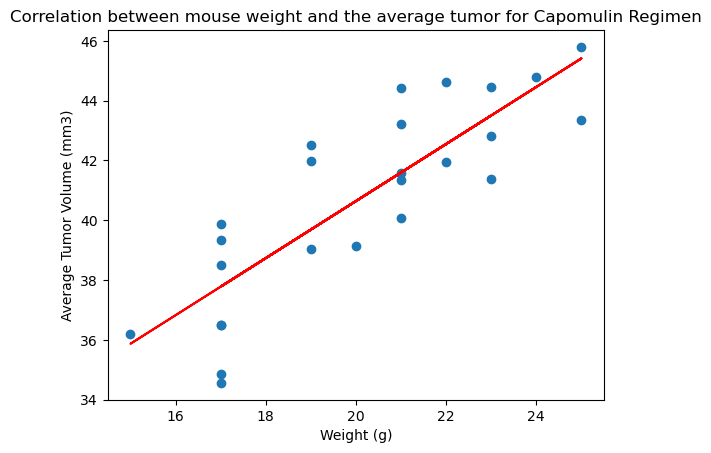

Correlation coefficient: 0.84
Slope: 0.95
Intercept: 21.55
R-value: 0.84
P-value: 0.00
Standard error: 0.13


In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = pymaceuticals_analysis_cleaned[pymaceuticals_analysis_cleaned['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient
correlation = np.corrcoef(mouse_weight, avg_tumor_volume)[0, 1]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)

# Create a scatter plot
plt.scatter(mouse_weight, avg_tumor_volume)

# Add the regression line
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', label='Linear Regression')

# Set labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Correlation between mouse weight and the average tumor for Capomulin Regimen')

# Show the plot
plt.show()

# Print correlation coefficient and linear regression parameters
print(f'Correlation coefficient: {correlation:.2f}')
print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-value: {r_value:.2f}')
print(f'P-value: {p_value:.2f}')
print(f'Standard error: {std_err:.2f}')
